In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler as PSampler
from qiskit.providers.basic_provider.basic_simulator import BasicSimulator

backend = BasicSimulator('qasm_simulator')

In [11]:
qbits_num = 3

quantum_register = QuantumRegister(qbits_num, 'q')
classical_register = ClassicalRegister(3, 'c')
quantum_circuit = QuantumCircuit(quantum_register, classical_register)

quantum_circuit.reset(range(qbits_num))

# Set latest qbit to |1>

quantum_circuit.x(quantum_register[2])
quantum_circuit.barrier()

# Walsh

quantum_circuit.h(range(qbits_num))
quantum_circuit.barrier()

# Oracle

quantum_circuit.x(quantum_register[0])
quantum_circuit.ccx(
    quantum_register[0],
    quantum_register[1],
    quantum_register[2])
quantum_circuit.x(quantum_register[0])
quantum_circuit.barrier()

# Inversion

quantum_circuit.h(range(qbits_num-1))
quantum_circuit.x(range(qbits_num-1))
# quantum_circuit.barrier()

quantum_circuit.h(quantum_register[1])
quantum_circuit.cx(quantum_register[0], quantum_register[1])
quantum_circuit.h(quantum_register[1])

# quantum_circuit.barrier()
quantum_circuit.x(range(qbits_num-1))
quantum_circuit.h(range(qbits_num-1))
quantum_circuit.barrier()

Statevector\
    .from_instruction(quantum_circuit)\
    .draw('latex')

<IPython.core.display.Latex object>

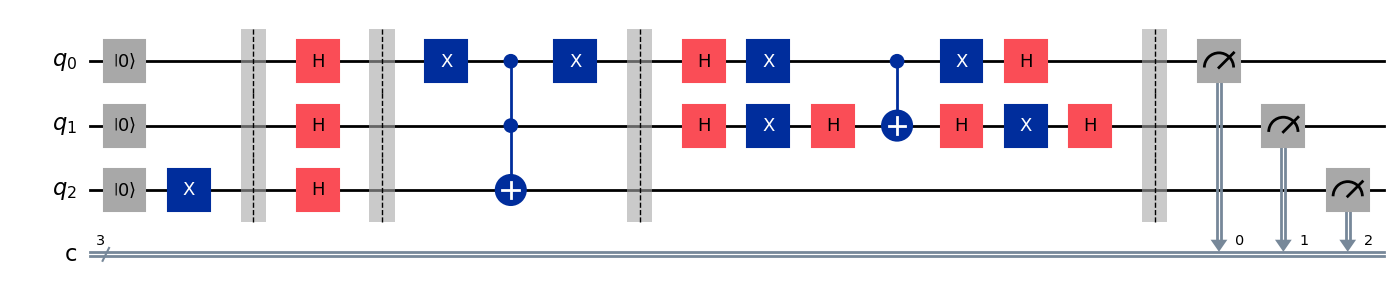

In [12]:
quantum_circuit.measure(quantum_register[0], classical_register[0])
quantum_circuit.measure(quantum_register[1], classical_register[1])
quantum_circuit.measure(quantum_register[2], classical_register[2])

quantum_circuit.draw('mpl')

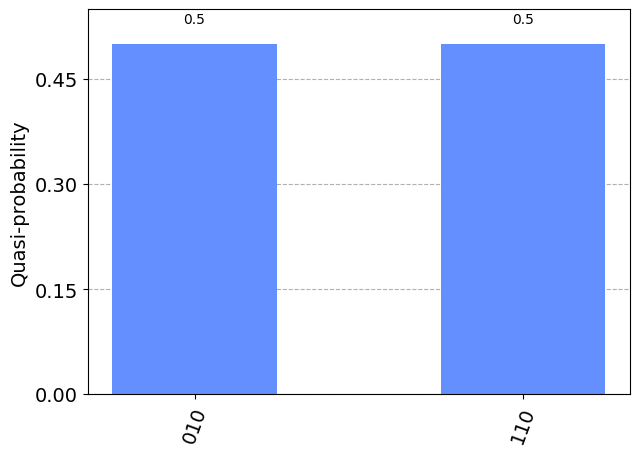

In [14]:
results = PSampler().run(quantum_circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))